# STOR 120: Take Home Midterm 1

60 points total

**Due:** Friday, February 10, 2023 to Gradescope no later than 11:15 AM.
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that does not involve communicating with others at all. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question. Make sure to view your submission in Gradescope and verify that it is the correct file and has the format that you intended it to have, including all code being shown and run. You may add extra code cells and additional lines of code to given cells as needed.

Come to office hours if you have specific questions regarding the exam. Due to the large class size, individual questions sent via email are not possible to answer for all students. Please refrain from posting public questions to Piazza before the exam is due.  

**Data:** Fitbit is an American consumer electronics and fitness company. It produces wireless-enabled wearable technology, physical fitness monitors and activity trackers such as smartwatches, pedometers and monitors for heart rate, quality of sleep and stairs climbed as well as related software. The dataset used on this exam was generated by respondents to a distributed survey via Amazon between March and May of 2016 with over thirty eligible Fitbit users consenting to the submission of their personal tracker data. Each row of the table represents data from one Fitbit user in a given day. Fitbit users (by`Id`) have data recorded in multiple rows of the dataset, corresponding to data recorded on different days. 

Run the cell below to setup the notebook and import the dataset.

In [85]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

fitbit = Table.read_table('https://raw.githubusercontent.com/JA-McLean/STOR120/master/data/fitbit_daily_activity.csv')
fitbit

Id,Month,Day,Year,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4,12,2016,13162,8.5,8.5,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4,13,2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4,14,2016,10460,6.74,6.74,0,2.44,0.4,3.91,0,30,11,181,1218,1776
1503960366,4,15,2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4,16,2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4,17,2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4,18,2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4,19,2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4,20,2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786
1503960366,4,21,2016,9819,6.34,6.34,0,1.34,0.35,4.65,0,19,8,211,838,1775


**Question 1.1.**

Assign `Most_Active_ID` to the  `Id` of the fitbit user who had the day with the highest number of `VeryActiveMinutes`.

In [86]:
Most_Active_ID = fitbit.sort('VeryActiveMinutes', descending = True).column("Id").item(0)
Most_Active_ID

5577150313

**Question 1.2.**

For only the `Most_Active_ID` found in question 1.1, construct a histogram for their daily `VeryActiveMinutes`. Your bins should start at 0 minutes, be 50 minutes wide, and contain all of this `Most_Active_ID`'s values of `VeryActiveMinutes` in the dataset.

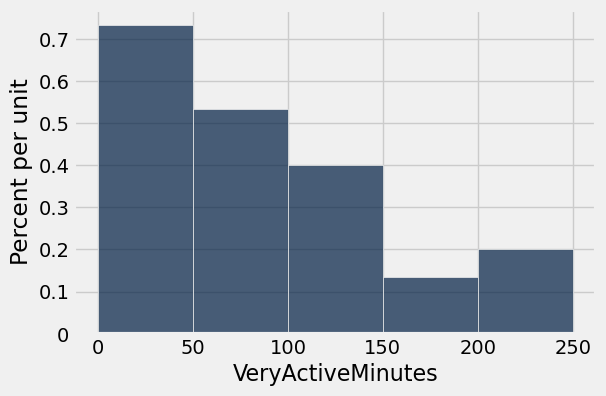

In [87]:
Only_Most_Active_ID = fitbit.where('Id', Most_Active_ID)
Only_Most_Active_ID.hist('VeryActiveMinutes', bins = np.arange(0, max(Only_Most_Active_ID.column('VeryActiveMinutes')) + 50, 50))

**Question 1.3.**

Based on the histogram, estimate the percentage of the days in the dataset that the `Most_Active_ID` from question 1.1 had between 200 and 250 very active minutes. Assign this value to `VeryActivePercentEstimate`, showing the arithmetic that you used to come up with your answer.

In [88]:
width = 250 - 200
VeryActivePercentEstimate = width * .2
VeryActivePercentEstimate

10.0

**Question 1.4.**

Use the `fitbit` table to calculate the exact percentage of days in the dataset that the `Most_Active_ID` from question 1.1 had with between 200 and 250 very active minutes. Assign this percentage to `VeryActivePercent`.

In [89]:
VeryActivePercent = 100 * fitbit.where('Id', Most_Active_ID).where('VeryActiveMinutes', are.between(200, 251)).num_rows / fitbit.where('Id', Most_Active_ID).num_rows
VeryActivePercent

10.0

**Question 2.1.**

Assign `fitbit2` to a table with all of the rows from the `fitbit` table, the columns for `Id`, `Calories`, and a new column labeled `VeryOrFairlyActiveMinutes`. The values in this column should be the sum of the values of `VeryActiveMinutes` and `FairlyActiveMinutes` for each row of the `fitbit` table.

In [90]:
fitbit2 = fitbit.select('Id', 'Calories').with_column('VeryOrFairlyActiveMinutes', (fitbit.column('VeryActiveMinutes') + fitbit.column('FairlyActiveMinutes')))
fitbit2

Id,Calories,VeryOrFairlyActiveMinutes
1503960366,1985,38
1503960366,1797,40
1503960366,1776,41
1503960366,1745,63
1503960366,1863,46
1503960366,1728,58
1503960366,1921,58
1503960366,2035,81
1503960366,1786,40
1503960366,1775,27


**Question 2.2.**

Recall that each `Id` represents a Fitbit user. Create a table and assign this table to `Averages_by_Id` in the cell below. This table should have one row for each distinct `Id` and three columns, the `Id`, `Average Calories`, and `Average (Very or Fairly) Active Minutes`. Now, `Average Calories` and `Average (Very or Fairly) Active Minutes` should be the average values for `Calories` and `VeryOrFairlyActiveMinutes` respectively, for each fitbit user (`Id`) across all days of the recorded data.

In [91]:
Averages_by_Id = fitbit2.group('Id', np.average)
Averages_by_Id = Averages_by_Id.relabeled('Calories average', 'Average Calories').relabeled('VeryOrFairlyActiveMinutes average', 'Average (Very or Fairly) Active Minutes')
Averages_by_Id

Id,Average Calories,Average (Very or Fairly) Active Minutes
1503960366,1816.42,57.871
1624580081,1483.35,14.4839
1644430081,2811.3,30.9333
1844505072,1573.48,1.41935
1927972279,2172.81,2.09677
2022484408,2509.97,55.6452
2026352035,1540.65,0.354839
2320127002,1724.16,3.93548
2347167796,2043.44,34.0556
2873212765,1916.97,20.2258


**Question 2.3.**

Using the table from question 2.2, first construct a scatter plot to view the relationship between `Average Calories` and `Average (Very or Fairly) Active Minutes` for these fitbit users. Then , in the cell below the scatterplot, describe any overall trends that you see in the scatterplot.

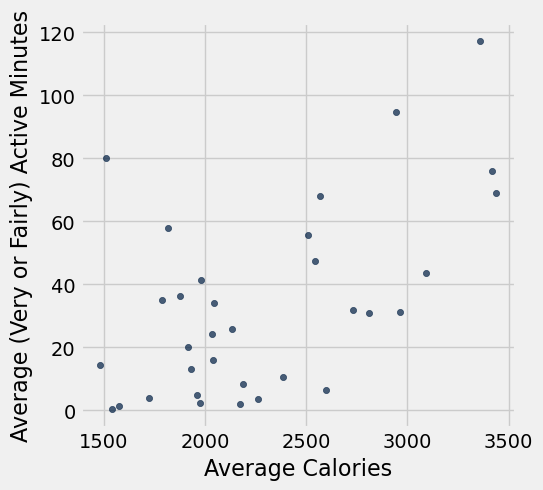

In [92]:
Averages_by_Id.scatter('Average Calories', 'Average (Very or Fairly) Active Minutes')

In the scatter plot we can see a positive relationship. As the number of Average calories increases, the Average (Very or Fairly) Active Minutes also tends to increase

**Question 3.**

For `Id` $1503960366$ construct a lineplot for their `TotalDistance` (measured in kilometers) by `Day` over the month of April. On the plot you should also:
* Adjust the vertical axis to start at 0
* Add an appropriate title to the plot
* Add two horizontal lines to the plot, in different colors. One for the mean daily `TotalDistance` for this `Id` ($1503960366$) in the month of April and a second for the mean daily `TotalDistance` for all fitbit users combined in the month of April

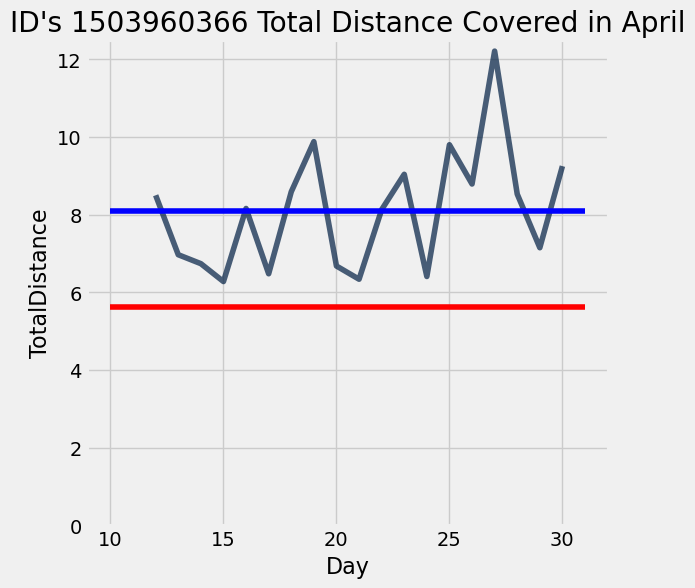

In [93]:
mean_daily_personalID_for_april = np.mean(fitbit.where('Id', 1503960366).where('Month', 4).column('TotalDistance'))
mean_daily_AllIDs = np.mean(fitbit.where('Month', 4).column('TotalDistance'))

PersonalID_for_april = fitbit.where('Id', 1503960366).where('Month', 4)
PersonalID_plot = PersonalID_for_april.plot('Day', 'TotalDistance')

plots.title("ID's 1503960366 Total Distance Covered in April")
plots.ylim(0)
plots.hlines(mean_daily_personalID_for_april, 10, 31, color = 'blue')
plots.hlines(mean_daily_AllIDs, 10, 31, color = 'red')

**Question 4.1.**

Construct a function `user_daily_prop` that has three arguments: `Id`, `Month`, and `Day`. For the given `Id`, `Month`, and `Day` the function should return a float value for the proportion of that fitbit user's (`Id`) `TotalSteps` that occurred during the given day out of the total of all of that fitbit user's (`Id`) `TotalSteps` recorded in the data set. 

Assume that the only allowable values and combinations of values for the three arguments (`Id`, `Month`, and `Day`) are those that exist in the dataset.

In [94]:
def user_daily_prop(Id, Month, Day):
    #find the proportion of the user's Total Steps that occurred during the given day out of all their steps
    given_day = fitbit.where('Id', Id).where('Month', Month).where('Day', Day).column('TotalSteps')
    total_steps = sum(fitbit.where('Id', Id).column('TotalSteps'))
    final_value = float(given_day/total_steps)
    return final_value

# Do not change the code below this line
user_daily_prop(1503960366, 4, 29)

0.029766864828456495

**Question 4.2.**

Assign `fitbit3` to a table with all of the rows from the `fitbit` table, the columns for `Id`, `Month`, `Day`, and a new column labeled `TotalStep Proportion`. To construct this new column, use the function from question 4.2 to calculate the proportion of `TotalSteps` that occurred in each row of the table out of the total of all of that fitbit user's (`Id`) `TotalSteps` recorded in the data set.

In [95]:
fitbit3 = fitbit.select('Id', 'Month', 'Day').with_column('TotalStep Proportion', fitbit.apply(user_daily_prop, 'Id', 'Month', 'Day'))
fitbit3

Id,Month,Day,TotalStep Proportion
1503960366,4,12,0.0350408
1503960366,4,13,0.0285795
1503960366,4,14,0.0278474
1503960366,4,15,0.0259891
1503960366,4,16,0.0337283
1503960366,4,17,0.0258374
1503960366,4,18,0.0346601
1503960366,4,19,0.0412812
1503960366,4,20,0.028071
1503960366,4,21,0.0261409


**Question 5.**

Do the fitbit users in this data set average more `TotalSteps` on Saturdays in April compared to their average of `TotalSteps` on all other days (combined) in April? The day of the week is not listed in the `fitbit` table. Below is an additional dataset `April_Days_of_Week` containing the thirty days of April in 2016 and their corresponding `Day_of_Week`. Run the cell below to import the `April_Days_of_Week` table. You will need both the `fitbit` and `April_Days_of_Week` tables to answer this question.

Assign `Sat_TotalSteps_Average` to the average of the `TotalSteps` of fitbit users on Saturdays in April. 

Assign `NotSat_TotalSteps_Average` to the average of the `TotalSteps` of fitbit users on days that are not Saturdays in April.
 

In [96]:
April_Days_of_Week = Table.read_table('https://raw.githubusercontent.com/JA-McLean/STOR120/master/data/April_Days_of_Week.csv')
April_Days_of_Week

Day,Day_of_Week
1,Friday
2,Saturday
3,Sunday
4,Monday
5,Tuesday
6,Wednesday
7,Thursday
8,Friday
9,Saturday
10,Sunday


In [97]:
combined_table = fitbit.where('Month', 4).join('Day', April_Days_of_Week, 'Day')
combined_table

Sat_TotalSteps_Average = np.average(combined_table.where('Day_of_Week', 'Saturday').column('TotalSteps'))
NotSat_TotalSteps_Average = np.average(combined_table.where('Day_of_Week', are.not_equal_to('Saturday')).column('TotalSteps'))

# Do not change the code below this line
Sat_TotalSteps_Average, NotSat_TotalSteps_Average

(8458.7684210526313, 7692.1279069767443)